## Problem Definition

This project aims to predict diabetes using machine learning with features such as Sex, Age, blood pressure, cholestoerol level, BMI, lifestyle and
eating habits.

# Data Collection And Preprocessing


# New Section

# Data Information

The dataset was obtained from Kaggle. It is a clean dataset of 253,680 records and 21 feature variables and 1 label. All 21 features have discrete values except the Body mass index(BMI) feature.

#Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.xls")
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Checking for missing values
data.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


There are no missing values in the dataset.

In [ ]:
# Dataset shape
data.shape

(253680, 22)

In [ ]:
# Renaming the Diabetes_012 column
data = data.rename(columns={'Diabetes_012' : 'Diabetes'})

# Changing the position of columns
# Removing the columns
age = data.pop('Age')
sex = data.pop('Sex')
diabetes = data.pop('Diabetes')

# Inserting the columns in the desired positions
data.insert((0), ('Age'), age)
data.insert((1), ('Sex'), sex)
data.insert((21), ('Diabetes'), diabetes)

# Displaying the first few rows of the updated dataframe
data.head()

,Age,Sex,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Education,Income,Diabetes
0,9.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,18.0,15.0,1.0,4.0,3.0,0.0
1,7.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,6.0,1.0,0.0
2,9.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,5.0,30.0,30.0,1.0,4.0,8.0,0.0
3,11.0,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,6.0,0.0
4,11.0,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,3.0,0.0,0.0,5.0,4.0,0.0


In [ ]:
# Value count
data.Diabetes.value_counts()

,count
Diabetes,
0.0,213703
2.0,35346
1.0,4631


In [ ]:
pd.crosstab(index=data.Diabetes, columns=data.Sex)

Sex,0.0,1.0
Diabetes,,
0.0,120959,92744
1.0,2604,2027
2.0,18411,16935


In [22]:
# Ploting the value counts with a bar graph
data.Diabetes.value_counts().sort_index().plot(kind="bar", color=["dimgray", "gray", "darkgray"]);

# Giving attributes to the chart to improve readability
plt.title("Disease Categories")
plt.xlabel("0 = Normal, 1 = Pre-Diabetes, 2 = Diabetes")
plt.ylabel("Quantity")
plt.xticks(rotation=0);

AttributeError: 'DataFrame' object has no attribute 'Diabetes'

In [21]:
# Create a plot
pd.crosstab(data.Sex, data.Diabetes).plot(kind="bar", figsize=(8,5), color=["dimgray", "gray", "darkgray"])

# Add some attributes to it
plt.title("Diabetes Frequency vs Sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Quantity")
plt.legend(["Normal", "Prediabetic", "Diabetic"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

AttributeError: 'DataFrame' object has no attribute 'Diabetes'

In [20]:
# Create a cross-tabulation
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes).plot(kind="bar", figsize=(8,5), color=["dimgray", "gray", 'darkgray'])

# Add some attributes to it
plt.title("Diabetes Frequency vs Alchohol consumption")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Quantity")
plt.legend(["Normal", "Prediabetes", "Diabetes"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

AttributeError: 'DataFrame' object has no attribute 'Diabetes'

The chart above implies that in the dataset, those who arent heavy drinkers have the highest number of non-diabetic patients but also a high number of diabetic patients.

We can infere that alcohol consumption doesnt play a major role in the diabetic nature of a person.

In [14]:
pd.crosstab(data.HighChol, data.Diabetes).plot(kind="bar", figsize=(8,5), color=["dimgray", "gray", 'darkgray'])

# Add some attributes to it
plt.title("Diabetes Frequency vs Cholesterol levels")
plt.xlabel("0 = No high cholesterol, 1 = High cholesterol")
plt.ylabel("Quantity")
plt.legend(["Normal", "Prediabetes", "Diabetes"])
plt.xticks(rotation=0);

AttributeError: 'DataFrame' object has no attribute 'Diabetes'

<BarContainer object of 253680 artists>

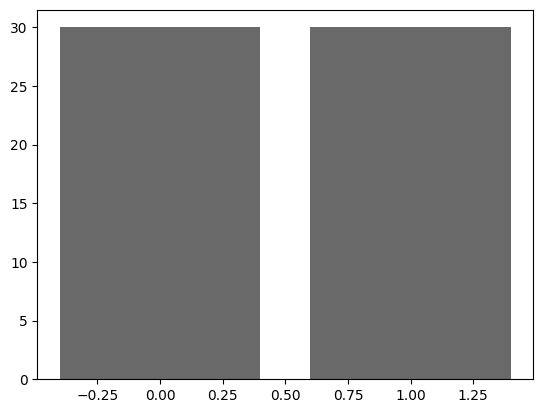

In [ ]:
plt.bar(data.DiffWalk, data.PhysHlth, color="dimgray")

## Feature Engineering

In [ ]:
# One Hot Encoding 'gender' column
diabetes_prediction_dataset = pd.get_dummies(data, columns=['gender'], drop_first=True)

# One Hot Encoding 'gender' column
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['gender'], drop_first=True)

# Handle 'smoking_history' and create an indicator for missing information
diabetes_prediction_dataset['smoking_history_no_info'] = (diabetes_prediction_dataset['smoking_history'] == 'No Info').astype(int)
diabetes_prediction_dataset = pd.get_dummies(diabetes_prediction_dataset, columns=['smoking_history'], drop_first=True)

# Categorize 'age' into age groups
age_bins = [0, 30, 50, 70, 100]
age_labels = ['<30', '30-50', '50-70', '>70']
diabetes_prediction_dataset['age_group'] = pd.cut(diabetes_prediction_dataset['age'], bins=age_bins, labels=age_labels)

# Categorize 'bmi' based on standard threshholds
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
diabetes_prediction_dataset['bmi_category'] = pd.cut(diabetes_prediction_dataset['bmi'], bins=bmi_bins, labels=bmi_labels)

#Create interaction features
diabetes_prediction_dataset['age_hypertension'] = diabetes_prediction_dataset['age'] * diabetes_prediction_dataset['hypertension']
diabetes_prediction_dataset['bmi_glucose_interaction'] = diabetes_prediction_dataset['bmi'] * diabetes_prediction_dataset['blood_glucose_level']

# Normalize continues features
scaler = MinMaxScaler()
continuous_features = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']
diabetes_prediction_dataset[continuous_features] = scaler.fit_transform(diabetes_prediction_dataset[continuous_features])

# Display  the first few rows of the updated dataframe
diabetes_prediction_dataset.head()
# Categorize 'age' into age groups
age_bins = [0, 30, 50, 70, 100]
age_labels = ['<30', '30-50', '50-70', '>70']
diabetes_prediction_dataset['age_group'] = pd.cut(diabetes_prediction_dataset['age'], bins=age_bins, labels=age_labels)

# Categorize 'bmi' based on standard threshholds
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
diabetes_prediction_dataset['bmi_category'] = pd.cut(diabetes_prediction_dataset['bmi'], bins=bmi_bins, labels=bmi_labels)

#Create interaction features
diabetes_prediction_dataset['age_hypertension'] = diabetes_prediction_dataset['age'] * diabetes_prediction_dataset['hypertension']
diabetes_prediction_dataset['bmi_glucose_interaction'] = diabetes_prediction_dataset['bmi'] * diabetes_prediction_dataset['blood_glucose_level']

# Normalize continues features
scaler = MinMaxScaler()
continuous_features = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']
diabetes_prediction_dataset[continuous_features] = scaler.fit_transform(diabetes_prediction_dataset[continuous_features])

# Display  the first few rows of the updated dataframe
diabetes_prediction_dataset.head()

In [ ]:
# @title age

from matplotlib import pyplot as plt
diabetes_prediction_dataset['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
# @title hypertension

from matplotlib import pyplot as plt
diabetes_prediction_dataset['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'diabetes_prediction_dataset' is not defined

## Model Selection#


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # Importing MinMaxScaler for feature scaling

# Load the dataset
# Load the dataset
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.xls")

# Instead of renaming the column, use the original column name 'Diabetes_012' for drop
X = data.drop('Diabetes_012', axis=1)  # Features
y = data['Diabetes_012']  # Target variable

#Feature Engineering steps applied directly to 'data'
# One Hot Encoding 'gender' column
# NOTE: Assuming 'gender' column should be 'Sex' based on previous code
data = pd.get_dummies(data, columns=['Sex'], drop_first=True, prefix='Sex')

# Assuming there is no smoking_history column, comment it out
# data['smoking_history_no_info'] = (data['smoking_history'] == 'No Info').astype(int)
# data = pd.get_dummies(data, columns=['smoking_history'], drop_first=True)

# Categorize 'age' into age groups
age_bins = [0, 30, 50, 70, 100]
age_labels = ['<30', '30-50', '50-70', '>70']
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Categorize 'bmi' based on standard threshholds
# NOTE: Assuming 'bmi' column should be 'BMI' based on previous code and column names
# Assuming there's a column 'BMI' in data frame for BMI values.
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data['bmi_category'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels)

# Assuming there's a hypertension and blood_glucose_level column:
# Create interaction features
data['age_hypertension'] = data['Age'] * data['HighBP'] # Assuming HighBP represents hypertension
data['bmi_glucose_interaction'] = data['BMI'] * data['HighChol'] # Assuming HighChol is blood_glucose_level


# Normalize continuous features
scaler = MinMaxScaler()
continuous_features = ['Age', 'BMI', 'GenHlth','MentHlth'] # Assuming GenHlth is HbA1c_level, and MentHlth is blood_glucose_level
data[continuous_features] = scaler.fit_transform(data[continuous_features])



# Assuming 'diabetes_prediction_datase' and 'Diabetes' are defined
X = data.drop('Diabetes_012', axis=1)  # Features # Drop the original column name before renaming
y = data['Diabetes_012']  # Target variable

# One-hot encode numerical features
X = pd.get_dummies(X, columns=['age_group','bmi_category'],drop_first=True)

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.7,random_state=31415)

# split the validation and test sets
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.15,random_state=31415)

# Initialize models
models = {
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()

}

results = {}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test,y_pred))

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.8476868138784542
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92    127111
         1.0       0.00      0.00      0.00      2752
         2.0       0.54      0.18      0.27     21076

    accuracy                           0.85    150939
   macro avg       0.47      0.39      0.40    150939
weighted avg       0.80      0.85      0.81    150939



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.8418897700395525
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91    127111
         1.0       0.02      0.00      0.00      2752
         2.0       0.49      0.20      0.28     21076

    accuracy                           0.84    150939
   macro avg       0.46      0.39      0.40    150939
weighted avg       0.80      0.84      0.81    150939

Gradient Boosting Accuracy: 0.8491774822941718
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92    127111
         1.0       0.00      0.00      0.00      2752
         2.0       0.55      0.19      0.29     21076

    accuracy                           0.85    150939
   macro avg       0.47      0.39      0.40    150939
weighted avg       0.81      0.85      0.81    150939


Best Model: Gradient Boosting with accuracy 0.8491774822941718


## Model Evaluation


## Hyperparameter Tuning